In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [106]:
df = pd.read_csv('bank.csv')
df = df.dropna()
df['대출액'] = (df['대출액']*1000).astype(int)
Counter(df['대출가능'])['Y']#/df['Loan_Status'].size

332

In [108]:
df['성별'] = df['성별'].replace({'Male':'남성', 'Female':'여성'})
df['대졸유무'] = df['대졸유무'].replace({'Graduate':'대졸', 'Not Graduate':'고졸'})
df.drop(['대출액', '대출계약기간'], axis=1, inplace=True)
df['거주지'] = df['거주지'].replace({'Urban':'특별시', 'Suburban':'광역시', 'Rural':'그 외'})

In [109]:
df

,Unnamed: 0,성별,결혼유무,가족 수(본인 제외),대졸유무,자영업자,본인 소득,본인 외 소득,신용유무,거주지,대출가능
1,1,남성,Yes,1.0,대졸,No,4583,1508.0,1.0,그 외,N
2,2,남성,Yes,0.0,대졸,Yes,3000,0.0,1.0,특별시,Y
3,3,남성,Yes,0.0,고졸,No,2583,2358.0,1.0,특별시,Y
4,4,남성,No,0.0,대졸,No,6000,0.0,1.0,특별시,Y
5,5,남성,Yes,2.0,대졸,Yes,5417,4196.0,1.0,특별시,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,609,여성,No,0.0,대졸,No,2900,0.0,1.0,그 외,Y
610,610,남성,Yes,3.0,대졸,No,4106,0.0,1.0,그 외,Y
611,611,남성,Yes,1.0,대졸,No,8072,240.0,1.0,특별시,Y
612,612,남성,Yes,2.0,대졸,No,7583,0.0,1.0,특별시,Y


In [110]:
pre_y = df['대출가능']
pre_X = df.drop('대출가능', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: 대출가능, Length: 480, dtype: int64

In [111]:
smote = SMOTE(sampling_strategy='minority') # ratio 없어진 옵션
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [112]:
Counter(y)

Counter({0: 332, 1: 332})

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [114]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 53us/step


[0.24239193899258832, 0.8983050584793091]

In [115]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.60)

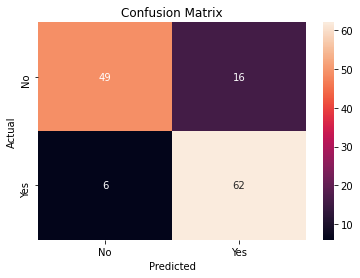

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);


ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [117]:
import pickle
import joblib # import 명령어 바뀜.
filename = 'bank_model.pkl'
joblib.dump(classifier, filename)

['bank_model.pkl']

In [118]:
mdl = joblib.load('bank_model.pkl')

In [119]:
# 테스트 파일 작성

In [121]:
# test.xlsx 파일
df = pd.read_csv('bank.csv')
df = df.dropna()

df['대출액'] = (df['대출액']*1000).astype(int)
df['성별'] = df['성별'].replace({'Male':'남성', 'Female':'여성'})
df['대졸유무'] = df['대졸유무'].replace({'Graduate':'대졸', 'Not Graduate':'고졸'})
df.drop(['대출액', '대출계약기간'], axis=1, inplace=True)
df['거주지'] = df['거주지'].replace({'Urban':'특별시', 'Suburban':'광역시', 'Rural':'그 외'})

pre_y = df['대출가능']
pre_X = df.drop('대출가능', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_X = dm_X.loc[:22, :]
dm_X.reset_index(inplace=True)
dm_X.drop('index', axis=1, inplace=True)
dm_X.to_excel('bank_test.xlsx')

In [122]:
X=pd.read_excel('bank_test.xlsx', index_col=0)
X

,Unnamed: 0.1,가족 수(본인 제외),본인 소득,본인 외 소득,신용유무,성별_남성,성별_여성,결혼유무_No,결혼유무_Yes,대졸유무_고졸,대졸유무_대졸,자영업자_No,자영업자_Yes,거주지_Semiurban,거주지_그 외,거주지_특별시
0,1,1,4583,1508,1,1,0,0,1,0,1,1,0,0,1,0
1,2,0,3000,0,1,1,0,0,1,0,1,0,1,0,0,1
2,3,0,2583,2358,1,1,0,0,1,1,0,1,0,0,0,1
3,4,0,6000,0,1,1,0,1,0,0,1,1,0,0,0,1
4,5,2,5417,4196,1,1,0,0,1,0,1,0,1,0,0,1
5,6,0,2333,1516,1,1,0,0,1,1,0,1,0,0,0,1
6,7,3,3036,2504,0,1,0,0,1,0,1,1,0,1,0,0
7,8,2,4006,1526,1,1,0,0,1,0,1,1,0,0,0,1
8,9,1,12841,10968,1,1,0,0,1,0,1,1,0,1,0,0
9,10,2,3200,700,1,1,0,0,1,0,1,1,0,0,0,1


In [123]:
sc = MinMaxScaler()
X_test = sc.fit_transform(X)
y_pred = mdl.predict(X_test)
y_pred=(y_pred>0.58)

In [124]:
X_test

array([[0.        , 0.33333333, 0.28452608, 0.13749088, 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.04761905, 0.        , 0.14737481, 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.0952381 , 0.        , 0.11124588, 0.21498906, 1.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.14285714, 0.        , 0.4072951 , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.19047619, 0.66666667, 0.35678392, 0.38256747, 1.        ,
        1.        , 0.        , 

In [125]:
y_pred

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False]])

In [132]:
val = pd.DataFrame(y_pred, columns=['상태'])

In [133]:
val=val.replace({True:'단기투자 적합자', False:'장기투자 적합자'})
val

,상태
0,장기투자 적합자
1,단기투자 적합자
2,단기투자 적합자
3,장기투자 적합자
4,장기투자 적합자
5,단기투자 적합자
6,장기투자 적합자
7,단기투자 적합자
8,장기투자 적합자
9,단기투자 적합자
